<a href="https://colab.research.google.com/github/aaubs/ds-master/blob/main/notebooks/M3_1_RNN_Tutorial_v2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# The objective of this tutorial

Our goal in this tutorial is to provide simple examples of the RNN model so that you can better understand its functionality and how it can be used in a domain.

After completing this tutorial, you will know:


```
- What is an RNN (Recurrent Neural Network)?
- How RNNs work and their structure?
- How RNNs can be used for tasks such as timeseries?
- How to implement an RNN in code using PyTorch?
- How to train and fine-tune an RNN for a specific task?
- Common challenges and pitfalls to avoid when working with RNNs?
```


## A quick recap on Simple Neural Network (FeedForward)

A simple neural network consists of three different parts namely Parameters, Linear, and None-Linear (Activation Function ) parts:

1. First, a weight is being applied to each input to an artificial neuron.
2. Second, the inputs are multiplied by their weights, and then a bias is applied to the outcome. This is called the weighted sum.
3. Third, the weighted sum is processed via an activation function, as a non-linear function.

<img src="https://cdn.analyticsvidhya.com/wp-content/uploads/2020/02/13UpdymQx-C1tBKRnfD7eOg.gif" width="500">

The neural network can compare the outputs of its nodes with the desired values using a property known as the delta rule, allowing the network to alter its weights through training to create more accurate output values. This training and learning procedure results in gradient descent.

The technique of updating weights in multi-layered perceptrons is virtually the same, however, the process is referred to as back-propagation. In such circumstances, the output values provided by the final layer are used to alter each hidden layer inside the network.

### Problems with a Simple Neural Network

The main shortcomings of traditional neural networks are:

1. They can not handle sequential data
2. They can not remember the sequence of the data, i.e order is not important
3. Can not share parameters across the sequence
4. They have a fixed input length

Let’s have a brief look at these problems, then dig deeper into RNN.

#### 1. They can not handle sequential data

Sequential data in RNN (Recurrent Neural Network) refers to any type of data where the observations have a temporal or sequential relationship. This could include time series data, where each observation is dependent on the previous one, or sequence data, where the order of the observations is important. In RNNs, this type of data is processed through the recurrent connections in the network, allowing the model to maintain and update an internal state based on the information in the sequence. This makes RNNs particularly well suited for tasks such as language modeling, speech recognition, and time series forecasting. There are some variations to the neural network’s configuration based on the shape of the input or output which you can see in the following:

<img src="https://raw.githubusercontent.com/aaubs/ds-master/main/data/Images/SeqData_RNN.png" width="400">



#### 2. They can not remember the sequence of the data, i.e order is not important

The second limitation of traditional neural networks is that they can not remember the sequence of the data, or the order is not important to them. Let’s understand this problem with an example which is shown in this figure (MIT 6.S191 Intro to Deep Learning).

![image.jpeg](https://raw.githubusercontent.com/aaubs/ds-master/main/data/Images/Problems-with-Traditional-Neural-Network-2.jpeg)



> *RNNs use feedback connections that allow information to be passed from one step of the sequence to the next, allowing the network to maintain and update an internal state that depends on the past input. This enables RNNs to capture and understand the dependencies and patterns in the sequence data, making them well suited for tasks such as natural language processing and time series analysis.*



#### 3. FeedForward Neural Network Can not share parameters across the sequence

In traditional Feedforward Neural Networks (MLPs), each input is processed independently and there is no mechanism for sharing parameters across different inputs in a sequence. For example, let’s take the sentence **“what is your name? My name is Lasse”**. In an MLP, each word would be treated as a separate input and would be processed through separate hidden layers. There is no way for the network to share information across words in the sequence, such as information about the relationship between words or about common features that occur across different parts of the sequence. In this case, "name"'s parameters should have been shared and so the neural network should have been able to determine that "name"'s words are dependent in this sentence.



> *In contrast, Recurrent Neural Networks (RNNs) have a hidden state that is updated at each time step, allowing the network to maintain information about the sequence and share parameters across different time steps. This makes RNNs well-suited for processing sequential data and for tasks such as sequence classification, language modeling, and machine translation*




Therefore Recurrent Neural Networks (RNN), originally were designed to handle some of the shortcomings that traditional neural networks have when dealing with sequential data.

## What is a Recurrent Neural Network?

Here we can see that the Simple Neural Network is unidirectional, which means it has a single direction, whereas the RNN, has loops inside it to persist the information over timestamp t. This looping preserves the information over the sequence.

<img src="https://raw.githubusercontent.com/aaubs/ds-master/main/data/Images/FNN-RNN.png" width="500">

#### Structure of RNN

Now, let’s dig deeper to understand what is happening under the hood. An RNN consists of four different parts:
1. Linear part (Parameters: This includes the weights and biases of the input-to-hidden layer, the hidden-to-hidden layer, and the hidden-to-output layer.)
> *The hidden state is used to capture the information from the previous time steps, but this information is not relevant after the training process is finished. Therefore, resetting the hidden state parameters to zero ensures that the network starts with a clean slate for making predictions on new, unseen data.*

2. The hidden state (also known as the context state)
> *you can think of the hidden state as representing the "memory" of the network, which is updated at each time step and used to produce the output.*


3. Non-Linear part (Activation Function (Tanh))
> As you can see in the equation above, you feed in both input vector Xt and the previous state ht-1 into the function. Here you’ll have 2 separate weight matrices then apply the Non-linearity (tanh) to the sum of input Xt and previous state ht-1 after multiplication to these 2 weight matrices.
<img src="https://raw.githubusercontent.com/aaubs/ds-master/main/data/Images/sequence-2.png" width="300">


4. Fully connected (Output layer): Finally, you’ll have the output vector ŷt at the timestamp t.
> <img src="https://raw.githubusercontent.com/aaubs/ds-master/main/data/Images/sequence-3.png" width="150">






### RNN code implementation

In Recurrent Neural Networks (RNNs), the terms "input size", "hidden size", and "number of outputs" refer to the following:
> Input size: Refers to the number of features in a single input sample. For example, if the input is a one-hot encoded word, the input size would be the number of unique words in the vocabulary.

> Hidden size: Refers to the number of neurons in the hidden layer. The hidden state of the RNN at each time step is represented by this layer, which helps to capture information from the past time steps.

> Number of outputs: Refers to the number of outputs generated by the RNN. This could be one output for a simple prediction problem, or multiple outputs for a multi-task prediction problem.

Note that these hyperparameters need to be set prior to training the RNN and their choice can affect the model's performance.

The "input to hidden" weights are the connections or weights between the input layer and the hidden layer, and these connections allow the network to learn how to propagate information from the input to the hidden state.

The "hidden to output" weights are the connections or weights between the hidden layer and the output layer, and these connections allow the network to learn how to produce the final output based on the hidden state.

The forward pass is the process of computing the output for a given input sequence. The forward pass starts by initializing the hidden state of the RNN with a zero vector or some other randomly generated values.

In the forward pass we understood how the inputs and the hidden states interact with the weights and biases of the recurrent layers and how to use the information contained in the last hidden state to predict the next time step value.


RNNs use feedback connections that allow information to be passed from one step of the sequence to the next, allowing the network to maintain and update an internal state that depends on the past input. This enables RNNs to capture and understand the dependencies and patterns in the sequence data, making them well suited for tasks such as natural language processing and time series analysis.

<img src="https://raw.githubusercontent.com/aaubs/ds-master/main/data/Images/rnn_timestamps.gif" width="700">

The backward pass is just the application of the chain rule from the loss gradient with respect to the predictions until it becomes with respect to the parameters we want to optimize.

<img src="https://raw.githubusercontent.com/aaubs/ds-master/main/data/Images/understanding-gradient-descent.png" width="400">

The hidden state is used to capture the information from the previous time steps, but this information is not relevant after the training process is finished. Therefore, resetting the hidden state to zero ensures that the network starts with a clean slate for making predictions on new, unseen data.


<img src="https://raw.githubusercontent.com/aaubs/ds-master/main/data/Images/rnn-shorttermmemory.gif" width="400">

### Which parameters have been trained and should be saved?

The "input to hidden" as Wi2h and the "hidden to hidden" as Wh2h weights are learned during the training process through backpropagation and gradient descent optimization algorithms, and they determine the strength of the relationships between the input, hidden, and output layers.

## How does PyTorch help to implement an RNN?


Let's implement this code using PyTorch!

In [9]:
# import required libraries
import torch
import pandas as pd
import torch.nn as nn
import torch.optim as optim
import numpy as np
from torch.utils.data import DataLoader, TensorDataset
from sklearn import preprocessing
import matplotlib.pyplot as plt
from tqdm import tqdm

### Data Preparation

To understand how should we prepare the data for RNN, we’ll use a simple dataset as a Timeseries Forecasting example. Below is the full sequence of values and their restructuring as a training and testing dataset.

<img src="https://raw.githubusercontent.com/aaubs/ds-master/main/data/Images/SequenceDataPerparation.webp" width="400">

Now, let’s separate the datasets into batches!

<img src="https://raw.githubusercontent.com/aaubs/ds-master/main/data/Images/Seq_DataPerparation_2.webp" width="100">

In [10]:
stock_data = np.array([10, 20, 30, 40, 50, 60, 70, 80, 90])

In [11]:
normalized_stock_data = preprocessing.normalize([stock_data])
print(normalized_stock_data)

[[0.05923489 0.11846978 0.17770466 0.23693955 0.29617444 0.35540933
  0.41464421 0.4738791  0.53311399]]


In [12]:
# Split the data into sequences for RNN input
sequence_length = 3
sequence_data = []
sequence_labels = []

for i in range(len(normalized_stock_data[0]) - sequence_length):
    sequence_data.append(normalized_stock_data[0][i:i+sequence_length])
    sequence_labels.append(normalized_stock_data[0][i+sequence_length])

sequence_data = np.array(sequence_data)
sequence_labels = np.array(sequence_labels)

train_data = sequence_data[:4]
train_labels = sequence_labels[:4]
test_data = sequence_data[4:]
test_labels = sequence_labels[4:]

In [13]:
print("Train data: \n", train_data)
print("Labels: \n", train_labels)

Train data: 
 [[0.05923489 0.11846978 0.17770466]
 [0.11846978 0.17770466 0.23693955]
 [0.17770466 0.23693955 0.29617444]
 [0.23693955 0.29617444 0.35540933]]
Labels: 
 [0.23693955 0.29617444 0.35540933 0.41464421]


Implementing code for LSTM and RNN requires sequential data preparation. The data preparation process for these models is visualized here!


<img src="https://raw.githubusercontent.com/aaubs/ds-master/main/data/Images/sequence.gif" width="600">


In [14]:
# Split the data into training and testing sets
train_data = TensorDataset(torch.from_numpy(train_data), torch.from_numpy(train_labels))
test_data = TensorDataset(torch.from_numpy(test_data), torch.from_numpy(test_labels))

train_loader = DataLoader(train_data, batch_size=1, shuffle=True)
test_loader = DataLoader(test_data, batch_size=1, shuffle=False)

We then have to prepare the dataset. We need the data as Pytorch tensors so that we can use that in our model which we will make. We use the dataloader so that we can extract the data in batches. This is especially helpful for large datasets.

<img src="https://raw.githubusercontent.com/aaubs/ds-master/main/data/Images/TensorDataset.webp" width="600">



In [15]:
# The RNN model
# Initializing Hyperparameters
epochs = 50
lr = 0.3

# 1. Creating a FeedForwardNetwork
# 1.1 Structure (Architecture) of NN
# Define the input size, hidden size and number of outputs
input_size = 1
hidden_size = 6
sequence_length = 3
output_size = 1

batch_size = 1

rnn = torch.nn.RNN(input_size, hidden_size, batch_first=True)
# Initialize the output layer
fc = torch.nn.Linear(hidden_size, output_size)


# 1.2 Loss Function
loss_mse = torch.nn.MSELoss()

# 1.3 Optmization Approch
optimizer = torch.optim.SGD(rnn.parameters(), lr=lr)

/usr/local/lib/python3.10/dist-packages/torch/nn/modules/loss.py:535: UserWarning: Using a target size (torch.Size([1])) that is different to the input size (torch.Size([1, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


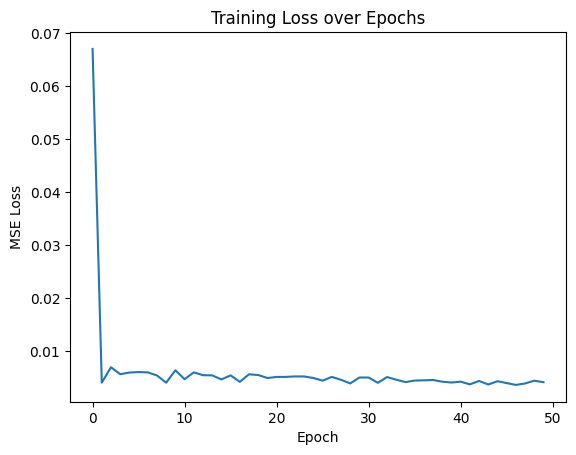

Test MSE: 0.023713534419022707


In [16]:
train_losses = []
test_losses = []

# Loop over the number of epochs
for i in range(epochs):
    train_loss = 0

    # Initialize the hidden state and the cell state
    # The hidden state resets to zero for every epoch
    hs = torch.zeros(1, batch_size, hidden_size)

    # Get the input and target at position i
    for i, (data, label) in enumerate(train_loader):

        # 2. Forward Pass
        output, hidden = rnn(data.float().reshape(1,3,1), hs)
        output_fc = fc(hidden[-1])

        # 3. FeedForward Evaluation
        loss = loss_mse(output_fc, label.float())
        hs = hs.detach()

        # 4. Backward Pass / Gradient Calculation
        loss.backward()

        # Store the loss for each epoch
        train_loss += loss.item()

        # 5. Back Propagation / Update Weights
        optimizer.step()
        optimizer.zero_grad()

    # Calculate the average training loss
    train_loss = train_loss / len(train_loader)
    train_losses.append(train_loss)

# Plot the MSE loss for each epoch
plt.plot(train_losses)
plt.xlabel('Epoch')
plt.ylabel('MSE Loss')
plt.title('Training Loss over Epochs')
plt.show()

# Evaluate the RNN model
mse = 0

with torch.no_grad():
    hs = torch.zeros(1, batch_size, hidden_size)
    for data, label in test_loader:
        output, hs = rnn(data.float().reshape(1,3,1), hs)
        output_fc = fc(hs[-1])

        mse += ((output_fc - label)**2).mean().item()

mse /= len(test_loader)
print('Test MSE: {}'.format(mse))

In [17]:
# Combine the parameters of the RNN layer and linear layer
params = list(rnn.parameters()) + list(fc.parameters())

# Print the number of parameters
print("Number of parameters:", sum(p.numel() for p in params))

# Print the shapes of the parameters
for name, param in rnn.named_parameters():
    print("Name: ", name)
    print("shape: ", param.shape)
    print("Weight: ", param.data)

Number of parameters: 61
Name:  weight_ih_l0
shape:  torch.Size([6, 1])
Weight:  tensor([[-0.1418],
        [-0.2820],
        [-0.1704],
        [-0.0094],
        [-0.1971],
        [-0.4406]])
Name:  weight_hh_l0
shape:  torch.Size([6, 6])
Weight:  tensor([[-0.3644, -0.2779,  0.3690,  0.3677,  0.2694,  0.1056],
        [-0.0162, -0.2200,  0.3301,  0.3634,  0.3793, -0.0480],
        [-0.1350,  0.1264,  0.2552,  0.2457,  0.2927,  0.0173],
        [-0.0284,  0.1324,  0.1474,  0.1989, -0.3919,  0.0172],
        [ 0.0238,  0.2969, -0.0959,  0.1169,  0.2936,  0.2434],
        [ 0.1689,  0.4075, -0.0976,  0.4398, -0.3280,  0.1292]])
Name:  bias_ih_l0
shape:  torch.Size([6])
Weight:  tensor([-0.0450, -0.0184,  0.0101, -0.3857, -0.2591,  0.0030])
Name:  bias_hh_l0
shape:  torch.Size([6])
Weight:  tensor([-0.1642, -0.0999, -0.2141, -0.3937,  0.2288,  0.0362])


In [18]:
predictions = []
label_test = []
with torch.no_grad():
    hs = torch.zeros(1, batch_size, hidden_size)
    for data, label in test_loader:
        output, hs = rnn(data.float().reshape(1,3,1), hs)
        output_fc = fc(hs[-1])
        label_test.append(label)

        predictions.append(output_fc)

In [19]:
predictions

[tensor([[0.3426]]), tensor([[0.3593]])]

In [20]:
label_test

[tensor([0.4739], dtype=torch.float64), tensor([0.5331], dtype=torch.float64)]